In [1]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [5]:
file_name = 'case01_velo_v.dat'

input_data = open('./Data/Autoencoder/Test/' + file_name)
read_data = np.loadtxt(input_data)
input_data.close()

read_data_tensor = read_data.reshape(1, len(np.atleast_1d(read_data)))
n_input = read_data.size

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 40
# 신경망 레이어 구성 옵션
n_hidden = 40  # 히든 레이어의 뉴런 갯수

with tf.variable_scope("autoencoder") :
    X = tf.placeholder(tf.float32, [1, n_input])

    # 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
    # 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
    # input -> encode -> decode -> output
    W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
    b_encode = tf.Variable(tf.random_normal([n_hidden]))
    # sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
    # sigmoid(X * W + b)
    # 인코더 레이어 구성
    encoder = tf.add(tf.matmul(X, W_encode), b_encode)

    # encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
    # decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
    # 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
    W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
    b_decode = tf.Variable(tf.random_normal([n_input]))
    # 디코더 레이어 구성
    # 이 디코더가 최종 모델이 됩니다.
    decoder = tf.add(tf.matmul(encoder, W_decode), b_decode)

    # 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
    # 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
    cost = tf.reduce_mean(tf.pow(X - decoder, 2))
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


In [114]:
input_data = open('./Data/Autoencoder/Test/' + file_name)
test_data = np.loadtxt(input_data)

input_data.close()

test_data = test_data.reshape(1, len(np.atleast_1d(test_data)))

avg_data = np.zeros((1, test_data.size))

print(avg_data)
#########
# 신경망 모델 학습
######

for i in range(0, 2) :
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)

        for epoch in range(120):
            total_cost = 0
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: read_data_tensor})
            total_cost += cost_val

        print(cost_val)

        output_data = sess.run(decoder, feed_dict={X: test_data})
        avg_data += output_data
        print(avg_data)
        np.savetxt('./Result/autoencoder/corr_' + str(i) + '_' + file_name, np.reshape(output_data, (output_data.size, 1)), delimiter=" ", fmt="%.4f")

#print(test_data.size)
#print(test_data)


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]]
0.000231145
[[ 0.20473018  0.1338926  -0.02509534 -0.16962373 -0.30520427 -0.21310771
  -0.15772486 -0.08924171  0.0559963   0.2338174   0.38401049  0.36473435
   0.32736683  0.28852209  0.08683169 -0.07043898 -0.25116843 -0.20512915
  -0.19298959 -0.19758976 -0.00861403  0.13788104  0.28840369  0.24438024
   0.24092525  0.18817708  0.01591691 -0.15425611 -0.31448704 -0.28106087
  -0.19676864 -0.18171713  0.0731976   0.26360649  0.46093339  0.4829011
   0.46737164  0.49170414  0.29907942  0.07310888 -0.10477674 -0.15939778
  -0.22067726 -0.27932206 -0.03412604  0.15768677  0.34015334  0.40234268
   0.48821265  0.57241642  0.39831972  0.28640753  0.11341363

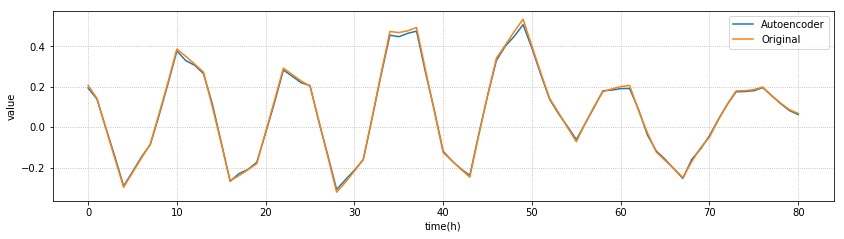

In [12]:
file_name = 'case01_velo_v.dat'

ori_data  = open('./Data/Autoencoder/Test/' + file_name)
data  = open('./Result/autoencoder/Corrected/01/' + file_name)

read_ori_data = np.loadtxt(ori_data)
read_auto_data = np.loadtxt(data)

ori_data.close()
data.close()

plt.plot(read_auto_data, label='Autoencoder')
plt.plot(read_ori_data, label='Original')
#plt.title('case01 velo_v')

plt.xticks(range(0, len(read_ori_data), 10))

#plt.ylim(-12, 7.5)
#plt.xlim(-2, 240)

plt.rc('grid', linestyle=':')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.xlabel('time(h)')
plt.ylabel('value')
fig = plt.gcf()

fig.set_size_inches(14, 3.5)   # case01
#fig.set_size_inches(12, 6)   # case05

plt.show()